# SVM

Ideja je pronaći pravu (ili u više dimenzija hiperravan) koja razdvaja podatke iz dve klase. Takvih razdvajajućih hiperravni ima više, treba izabrati najbolju - onu koja se nalazi na bezbednom rastojanju i od jedne, i od druge klase. Ako podaci nisu baš linearno razdvojivi, koristimo meku marginu - dopuštamo neke instance sa pogrešne strane granice. Ako podaci nisu uopšte linearno razdvojivi, koristimo kernele.

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
X, y = load_breast_cancer(return_X_y=True)

In [5]:
X.shape

(569, 30)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [8]:
X_train.shape

(426, 30)

In [9]:
X_test.shape

(143, 30)

In [4]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Zašto _params_ nije jedna obična mapa? 

In [15]:
params = [
            {
                'kernel': ['linear'],
                'C': [0.01, 0.1, 1, 10],
            },
            {
                'kernel': ['rbf'],
                'C': [0.01, 0.1, 1, 10],
                'gamma': [0.01, 0.1, 1, 10],
            },
         ]

In [16]:
gs = GridSearchCV(SVC(), params, scoring='accuracy', cv=5, verbose=5)

In [17]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.930 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=5)

In [18]:
gs.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [20]:
gs.best_score_

0.9789603283173735

In [21]:
y_pred = gs.best_estimator_.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [23]:
accuracy_score(y_test, y_pred)

0.9790209790209791

In [24]:
confusion_matrix(y_test, y_pred)

array([[50,  3],
       [ 0, 90]])

In [25]:
f1_score(y_test, y_pred)

0.9836065573770492

Pokušajte da još poboljšate rezultate dodatnim podešavanjem hiperparametara

## Kerneli

In [79]:
import numpy as np

In [80]:
num_instances = 1000
X = np.random.uniform(low=-1, high=1, size=(num_instances, 2))

Generišemo instance tako da je jedna klasa unutar kruga, a druga van.

In [81]:
def f(x, y):
    return x**2 + y**2 <= 0.5

In [82]:
y = f(X[:,0], X[:,1])

In [83]:
from matplotlib import pyplot as plt

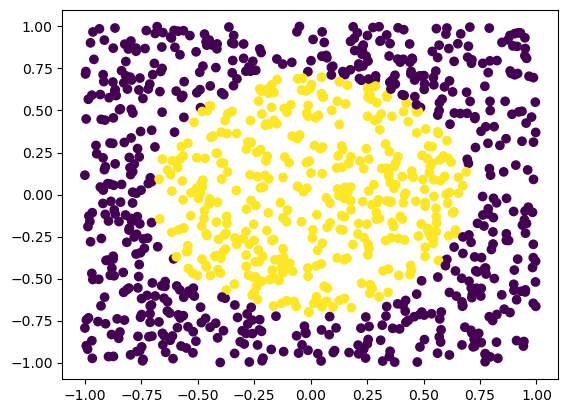

In [84]:
plt.scatter(X[:,0], X[:,1], c=y)

In [85]:
model = SVC(kernel='linear')

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=123)

In [87]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [88]:
y_train_pred = model.predict(X_train)

In [89]:
accuracy_score(y_train, y_train_pred)

0.6026666666666667

In [90]:
y_test_pred = model.predict(X_test)

In [91]:
accuracy_score(y_test, y_test_pred)

0.604

Očekivano, linearni SVM ne može da nađe pogodnu granicu između klasa jer je prava granica nelinearna.

In [92]:
model = SVC(kernel='rbf')

In [93]:
model.fit(X_train, y_train)

SVC()

In [94]:
y_train_pred = model.predict(X_train)

In [95]:
accuracy_score(y_train, y_train_pred)

0.9946666666666667

In [96]:
y_test_pred = model.predict(X_test)

In [97]:
accuracy_score(y_test, y_test_pred)

0.996

In [98]:
print(f'Broj potpornih vektora za svaku od klasa: {model.n_support_}')
print(f'Indeksi instanci koje su potporni vektori: {model.support_}')
print(f'Sami potporni vektori: {model.support_vectors_}')

Broj potpornih vektora za svaku od klasa: [82 84]
Indeksi instanci koje su potporni vektori: [ 10  11  13  18  26  29  31  32  39  69  77  84  89  90  98 104 105 116
 141 148 154 161 199 200 209 211 224 230 232 237 239 242 257 276 286 301
 321 328 338 339 360 361 378 380 392 401 421 422 440 443 459 464 472 480
 484 525 539 540 553 557 575 576 579 588 600 601 607 611 614 617 623 627
 656 659 662 688 689 693 705 725 736 747   3  16  17  21  25  37  48  49
  52  57  93 102 120 131 133 144 147 151 155 167 175 176 189 203 205 234
 241 244 248 256 261 263 266 296 302 319 325 330 342 351 366 391 393 395
 404 412 432 434 444 453 476 490 499 514 518 541 544 549 551 569 572 590
 592 593 602 604 610 625 629 633 664 669 677 680 683 690 696 697 704 706
 709 715 735 742]
Sami potporni vektori: [[ 0.63619616  0.48476659]
 [-0.32656511  0.68789711]
 [ 0.09800888  0.76304643]
 [-0.6029825   0.37101849]
 [ 0.46828552  0.53503764]
 [ 0.25648874  0.68682935]
 [-0.34183327  0.64750627]
 [-0.68972713  0.282

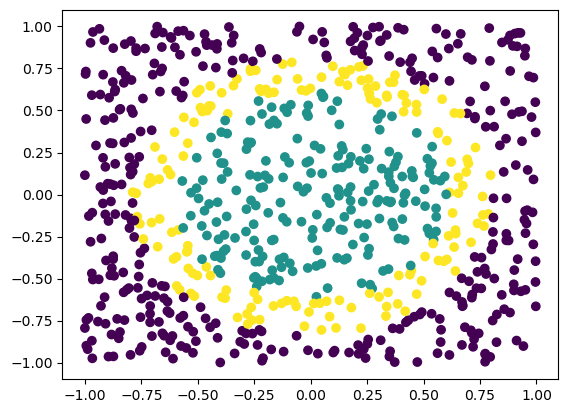

In [136]:
color = y_train.astype(int)
color[model.support_] = 2
plt.scatter(X_train[:,0], X_train[:,1], c=color)
plt.show()

### Vizuelizacija

In [129]:
def plot_3d(x, y, z, c, elev, azim):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.view_init(elev=elev, azim=azim)
    ax.scatter(x, y, z, c=c)
    plt.show()

Vizuelizacija Gausovog kernela

In [130]:
def visualize_rbf(X, y, gamma=1):
    z = np.exp(-gamma * (X**2).sum(1))
    plot_3d(X[:,0], X[:,1], z, c=y, elev=0, azim=30)

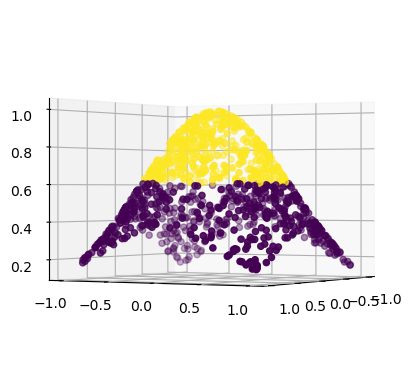

In [131]:
visualize_rbf(X, y)

Šta ako imamo polinomski kernel: $k_{poly}(x, x') = (x \cdot x')^2$?

Znamo da svaki kernel predstavlja skalarni proizvod u nekom transformisanom prostoru $k(x, x') = \phi(x) \cdot \phi(x')$. Hoćemo da odredimo $\phi$ za naš kernel $k_{poly}$
$$\phi(x) \cdot \phi(x') = (x_1^2, \sqrt{2}x_1x_2, x_2^2) \cdot  ({x'}_1^2, \sqrt{2}{x'}_1{x'}_2, {x'}_2^2) = x_1^2{x'}_1^2 + 2x_1x_2{x'}_1{x'}_2 + x_2^2{x'}_2^2 = (x_1{x'}_1 + x_2{x'}_2)^2 = ((x_1, x_2) \cdot ({x'}_1, {x'}_2))^2 = (x\cdot x')^2$$

Dakle, iscrtavamo vrednosti naših instanci u $3d$ prostoru nakon primene funkcije $\phi$.

In [134]:
def visualize_poly(X, y):
    plot_3d(X[:,0]**2, np.sqrt(2)*X[:,0]*X[:,1], X[:,1]**2, c=y, elev=0, azim=60)

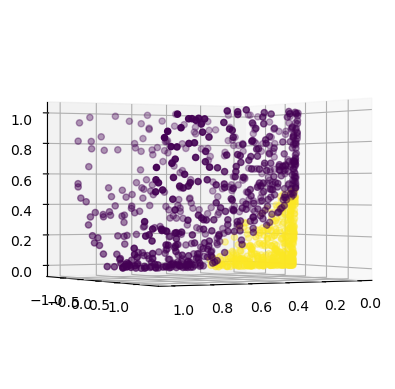

In [135]:
visualize_poly(X, y)